# ===========================
# Benchmarking - U P S C A L I N G - 3D TORUS
# ===========================

In [1]:
from benchmark_main import *

2021-12-31 12:32:00.259320: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-31 12:32:00.259611: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


_________
# 3D - Torus
_________

# FILE INPUT
+ precalculated network distances 

In [2]:
organism = 'torus' 
net_sizes = [96, 504, 968, 4950, 10000, 20000]

In [3]:
b_file100 = open('netdist_precalc/dist_network_96_torus.pkl', "rb")
dist_network100 = pickle.load(b_file100)
print('100 done')

b_file500 = open('netdist_precalc/dist_network_504_torus.pkl', "rb")
dist_network500 = pickle.load(b_file500)
print('500 done')

b_file1k = open('netdist_precalc/dist_network_968_torus.pkl', "rb")
dist_network1k = pickle.load(b_file1k)
print('1000 done')

100 done
500 done
1000 done


In [4]:
# 5k
b_file1_5k = open('netdist_precalc/dist_network_4950_torus_first.pkl', "rb")
part1_5k = pickle.load(b_file1_5k)

b_file2_5k = open('netdist_precalc/dist_network_4950_torus_second.pkl', "rb")
part2_5k = pickle.load(b_file2_5k)

b_file3_5k = open('netdist_precalc/dist_network_4950_torus_third.pkl', "rb")
part3_5k = pickle.load(b_file3_5k)

b_file4_5k = open('netdist_precalc/dist_network_4950_torus_fourth.pkl', "rb")
part4_5k = pickle.load(b_file4_5k)

dist_network5k = {
    **part1_5k,
    **part2_5k,
    **part3_5k,
    **part4_5k,
}
print('5k done')

5k done


In [5]:
# 10k

b_file1_10k = open('netdist_precalc/dist_network_10000_torus_first.pkl', "rb")
part1_10k = pickle.load(b_file1_10k)

b_file2_10k = open('netdist_precalc/dist_network_10000_torus_second.pkl', "rb")
part2_10k = pickle.load(b_file2_10k)

b_file3_10k = open('netdist_precalc/dist_network_10000_torus_third.pkl', "rb")
part3_10k = pickle.load(b_file3_10k)

b_file4_10k = open('netdist_precalc/dist_network_10000_torus_fourth.pkl', "rb")
part4_10k = pickle.load(b_file4_10k)

b_file5_10k = open('netdist_precalc/dist_network_10000_torus_fifth.pkl', "rb")
part5_10k = pickle.load(b_file5_10k)

b_file6_10k = open('netdist_precalc/dist_network_10000_torus_sixth.pkl', "rb")
part6_10k = pickle.load(b_file6_10k)

b_file7_10k = open('netdist_precalc/dist_network_10000_torus_seventh.pkl', "rb")
part7_10k = pickle.load(b_file7_10k)

b_file8_10k = open('netdist_precalc/dist_network_10000_torus_eigth.pkl', "rb")
part8_10k = pickle.load(b_file8_10k)

b_file9_10k = open('netdist_precalc/dist_network_10000_torus_nineth.pkl', "rb")
part9_10k = pickle.load(b_file9_10k)

b_file10_10k = open('netdist_precalc/dist_network_10000_torus_tenth.pkl', "rb")
part10_10k = pickle.load(b_file10_10k)

dist_network10k = {
    **part1_10k,
    **part2_10k,
    **part3_10k,
    **part4_10k,
    **part5_10k,
    **part6_10k,
    **part7_10k,    
    **part8_10k,
    **part9_10k,
    **part10_10k
}
print('10k done')

10k done


In [3]:
# 20k
b_file1_20k = open('netdist_precalc/dist_network_20020_torus_first.pkl', "rb")
part1_20k = pickle.load(b_file1_20k)

b_file2_20k = open('netdist_precalc/dist_network_20020_torus_second.pkl', "rb")
part2_20k = pickle.load(b_file2_20k)

b_file3_20k = open('netdist_precalc/dist_network_20020_torus_third.pkl', "rb")
part3_20k = pickle.load(b_file3_20k)

dist_network20k = {
    **part1_20k,
    **part2_20k,
    **part3_20k
}
print('20k done')

20k done


# GLOBAL LAYOUT 

In [64]:
# 3D TORUS 
organism = 'tor'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameters (post - testing)
n_neighbors = 8 #10
spread = 1
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

In [ ]:
#########
# 1 0 0 
#########

G = nx.grid_2d_graph(12,8,periodic=True)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network100.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_global = pearson_corrcoef(dist_network100, dist_global)
print('RWR corr coef: ',r_global)

In [54]:
#########
# 5 0 0 
#########

G = nx.grid_2d_graph(42,12,periodic=True)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network500.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network500, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:06
126756
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9879856446911155


In [65]:
#########
# 1 0 0 0 
#########

G = nx.grid_2d_graph(44,22,periodic=True)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:14
468028
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9798876769304308


In [ ]:
#########
# 5 0 0 0 
#########

G = nx.grid_2d_graph(90,55,periodic=True)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_global = pearson_corrcoef(dist_network5k, dist_global)
print('RWR corr coef: ',r_global)

In [12]:
#########
# 1 0 0 0 0 
#########

G = nx.grid_2d_graph(125,80,periodic=True)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network10k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network10k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:02:22
2363265
1k done
10k done
50k done
100k done
500k done
1mio done
2mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9854836378335068


In [6]:
#########
# 2 0 0 0 0 
#########

G = nx.grid_2d_graph(182,110,periodic=True)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network20k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network20k, dist_global)
print('RWR corr coef: ',r_global)

9971190
1k done
10k done
50k done
100k done
500k done
1mio done
2mio done
3mio done
4mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9832740436560791


In [3]:
# pearson correlation coefficient 

d_netsize_corr_global = {(12,8):0.995,
                                (42,12):0.988,
                                (44,22): 0.980,
                                (90,55):0.988,
                                (125,80):0.985,
                                (182,110):0.983 
                                }
# time in seconds 

d_netsize_time =  {(12,8):2,
                        (42,12):6,
                        (44,22):14,
                        (90,55):58,
                        (125,80):142, #2min 22s
                        (182,110):680 #11min 20s
                       }

# NODE2VEC 

In [6]:
# 3D TORUS 
organism = 'tor'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameters (post - testing)
n_neighbors = 8 #10
spread = 1
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

In [7]:
#########
# 1 0 0 
#########

G = nx.grid_2d_graph(12,8,periodic=True)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network100.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network100, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:00:16
4560
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9771278383632513


In [8]:
#########
# 5 0 0 
#########

G = nx.grid_2d_graph(42,12,periodic=True)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network500.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network500, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:00:36
126756
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9706187673267506


In [9]:
#########
# 1 0 0 0 
#########

G = nx.grid_2d_graph(44,22,periodic=True)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network1k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network1k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:01:23
468028
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9490551394930529


In [10]:
#########
# 5 0 0 0 
#########

G = nx.grid_2d_graph(90,55,periodic=True)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network5k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network5k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/users/christiane.huetter/miniconda3/envs/myenv_clip2/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-62494cfcd13f>", line 11, in <module>
    posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
  File "/users/christiane.huetter/cartoGRAPHs/benchmark/benchmark_main.py", line 1075, in layout_nodevec_umap
    seed=42,  # random seed fixed for reproducibility
  File "/users/christiane.huetter/miniconda3/envs/myenv_clip2/lib/python3.6/site-packages/stellargraph/data/explorer.py", line 498, in run
    mask = neighbours == previous_node
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/users/christiane.huetter/miniconda3/envs/myenv_clip2/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback

TypeError: object of type 'NoneType' has no len()

In [11]:
#########
# 1 0 0 0 0
#########

G = nx.grid_2d_graph(125,80,periodic=True)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network10k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network10k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:06:24
49995000
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9774554552274938


In [5]:
#########
# 2 0 0 0 0
#########

G = nx.grid_2d_graph(182,110,periodic=True)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network20k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network20k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:15:27
9971190
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9687485906465486


In [4]:
# pearson correlation coefficient 

d_netsize_corr_nodevec = {(12,8):0.977,
                        (42,12):0.968,
                        (44,22):0.949,
                        (90,55):0.977,
                        (125,80):0.977,
                        (182,110):0.969
                       }
# time in seconds 

d_netsize_time_nodevec =  {(12,8):16, #11,
                                (42,12):36, #11,
                                (44,22):83, #1min 23s #21,
                                (90,55):198, #3min 18s,
                                (125,80):384, #6min 24s
                                (182,110):927 #15min 27s,
                                }

# FORCE-DIRECTED | NETWORKX
+ using the spring-layout

In [ ]:
#########
# 1 0 0 
#########

G = nx.grid_2d_graph(12,8,periodic=True)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=2500)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network100.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network100, dist_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
#########
# 5 0 0 
#########

G = nx.grid_2d_graph(42,12,periodic=True)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=60)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network500.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
#########
# 1 0 0 0 
#########

G = nx.grid_2d_graph(44,22,periodic=True)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=125)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
#########
# 5 0 0 0 
#########

G = nx.grid_2d_graph(90,55,periodic=True)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=30)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
#########
# 1 0 0 0 0 
#########

G = nx.grid_2d_graph(125,80,periodic=True)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=20)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('RWR corr coef: ',r_spring)

In [14]:
#########
# 2 0 0 0 0 
#########

G = nx.grid_2d_graph(182,110,periodic=True)

print('spring')
start = time.time()
posG_spring = springlayout_3D(G,itr=28)
end = time.time()
m,s = exec_time(start,end)
print('spring done')

pairs = list(dist_network20k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

spring
Execution Time: 00:11:13
spring done
9971190
1k done
10k done
50k done
100k done
500k done
1mio done
2mio done
3mio done
4mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.49822757813105384


#### CORR COEF / NETSIZE - saved values for diagram
+ for equal running time

In [5]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_nx = {
                                (12,8):0.979,
                                (42,12):0.937,
                                (44,22):0.930,
                                (90,55):0.552, 
                                (125,80):0.510,
                                (182,110):0.498
                                   }


# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_nx = {
                                (12,8):5,
                                (42,12):42,
                                (44,22):71,
                                (90,55):1933, 
                                (125,80):8000, 
                                (182,110):43200, # cut off 
                                   }

# FORCE-DIRECTED | iGRAPH
+ https://igraph.org/python/doc/tutorial/visualisation.html
+ https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4
+ https://igraph.org/c/doc/igraph-Layout.html#igraph_layout_fruchterman_reingold_3d
+ using the fruchterman-reingold layout

In [7]:
import igraph as ig

In [22]:
print('Run for', d_netsize_time[(12,8)],'seconds')

#########
# 1 0 0 
#########

nxG = nx.grid_2d_graph(12,8,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 70000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network100.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network100, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 2 seconds
SPRING - igraph
Execution Time: 00:00:02
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9805166998936219


In [27]:
print('Run for', d_netsize_time[(42,12)],'seconds')

#########
# 5 0 0 
#########

nxG = nx.grid_2d_graph(42,12,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 7000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network500.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 6 seconds
SPRING - igraph
Execution Time: 00:00:05
126756
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9709491236320805


In [29]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(42,12)])

nxG = nx.grid_2d_graph(42,12,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 100000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network500.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for pearson corr.: 0.988
SPRING - igraph
Execution Time: 00:01:20
126756
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9722156251699108


In [39]:
print('Run for', d_netsize_time[(44,22)],'seconds')

#########
# 1 0 0 0 
#########

nxG = nx.grid_2d_graph(44,22,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 4800)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network1k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 14 seconds
SPRING - igraph
Execution Time: 00:00:14
468028
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9773482386205915


In [40]:
print('Run for', d_netsize_time[(90,55)],'seconds')

#########
# 5 0 0 0 
#########

nxG = nx.grid_2d_graph(90,55,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=650)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 58 seconds
SPRING - igraph
Execution Time: 00:00:41
12248775
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9436374158865177


In [17]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(90,55)])

nxG = nx.grid_2d_graph(90,55,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 10000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for pearson corr.: 0.988
SPRING - igraph
Execution Time: 00:17:13
1469833
1k done
10k done
50k done
100k done
500k done
1mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9919239436173475


In [14]:
print('Run for', d_netsize_time[(125,80)],'seconds')

#########
# 1 0 0 0 0 
#########

nxG = nx.grid_2d_graph(125,80,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=480)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 142 seconds
SPRING - igraph
Execution Time: 00:02:18
49995000
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.8202207063961992


In [ ]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(125,80)])

nxG = nx.grid_2d_graph(125,80,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=50000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
print('Run for', d_netsize_time[(182,110)],'seconds')

#########
# 2 0 0 0 0 
#########

nxG = nx.grid_2d_graph(182,110,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=5000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network20k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

In [10]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(182,110)])

nxG = nx.grid_2d_graph(182,110,periodic=True)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=20000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network20k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

# iter 100 > 0.735 > 1min 57s
# iter 1000 > 0.960 > 20mnin 17s
# iter 1000 > 0.951 > 26mnin 10s
# iter 5000 > 0.972 > 2h 11min 40s 
# iter 20 000 > 0.966 > 9h 19min 54s

done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9663158514498945


In [6]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_ig = {       (12,8): 0.980,  
                            (42,12): 0.972,
                            (44,22): 0.971,
                            (90,55): 0.944,
                            (125,80): 0.897,
                            (182,110): 0.885,
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_ig = {       (12,8):2,  
                            (42,12):60,
                            (44,22):540,
                            (90,55):1033, # 17min 13s 
                            (125,80):20690, # 5h 44min 50s
                            (182,110):43200 # 12h cut off,
                               }

# DIAGRAMS
+ comparing runtime and pearson corr. coeff. of global layout to three force-directed layout methods 

In [8]:
labelsize = 22
tick_size = 12

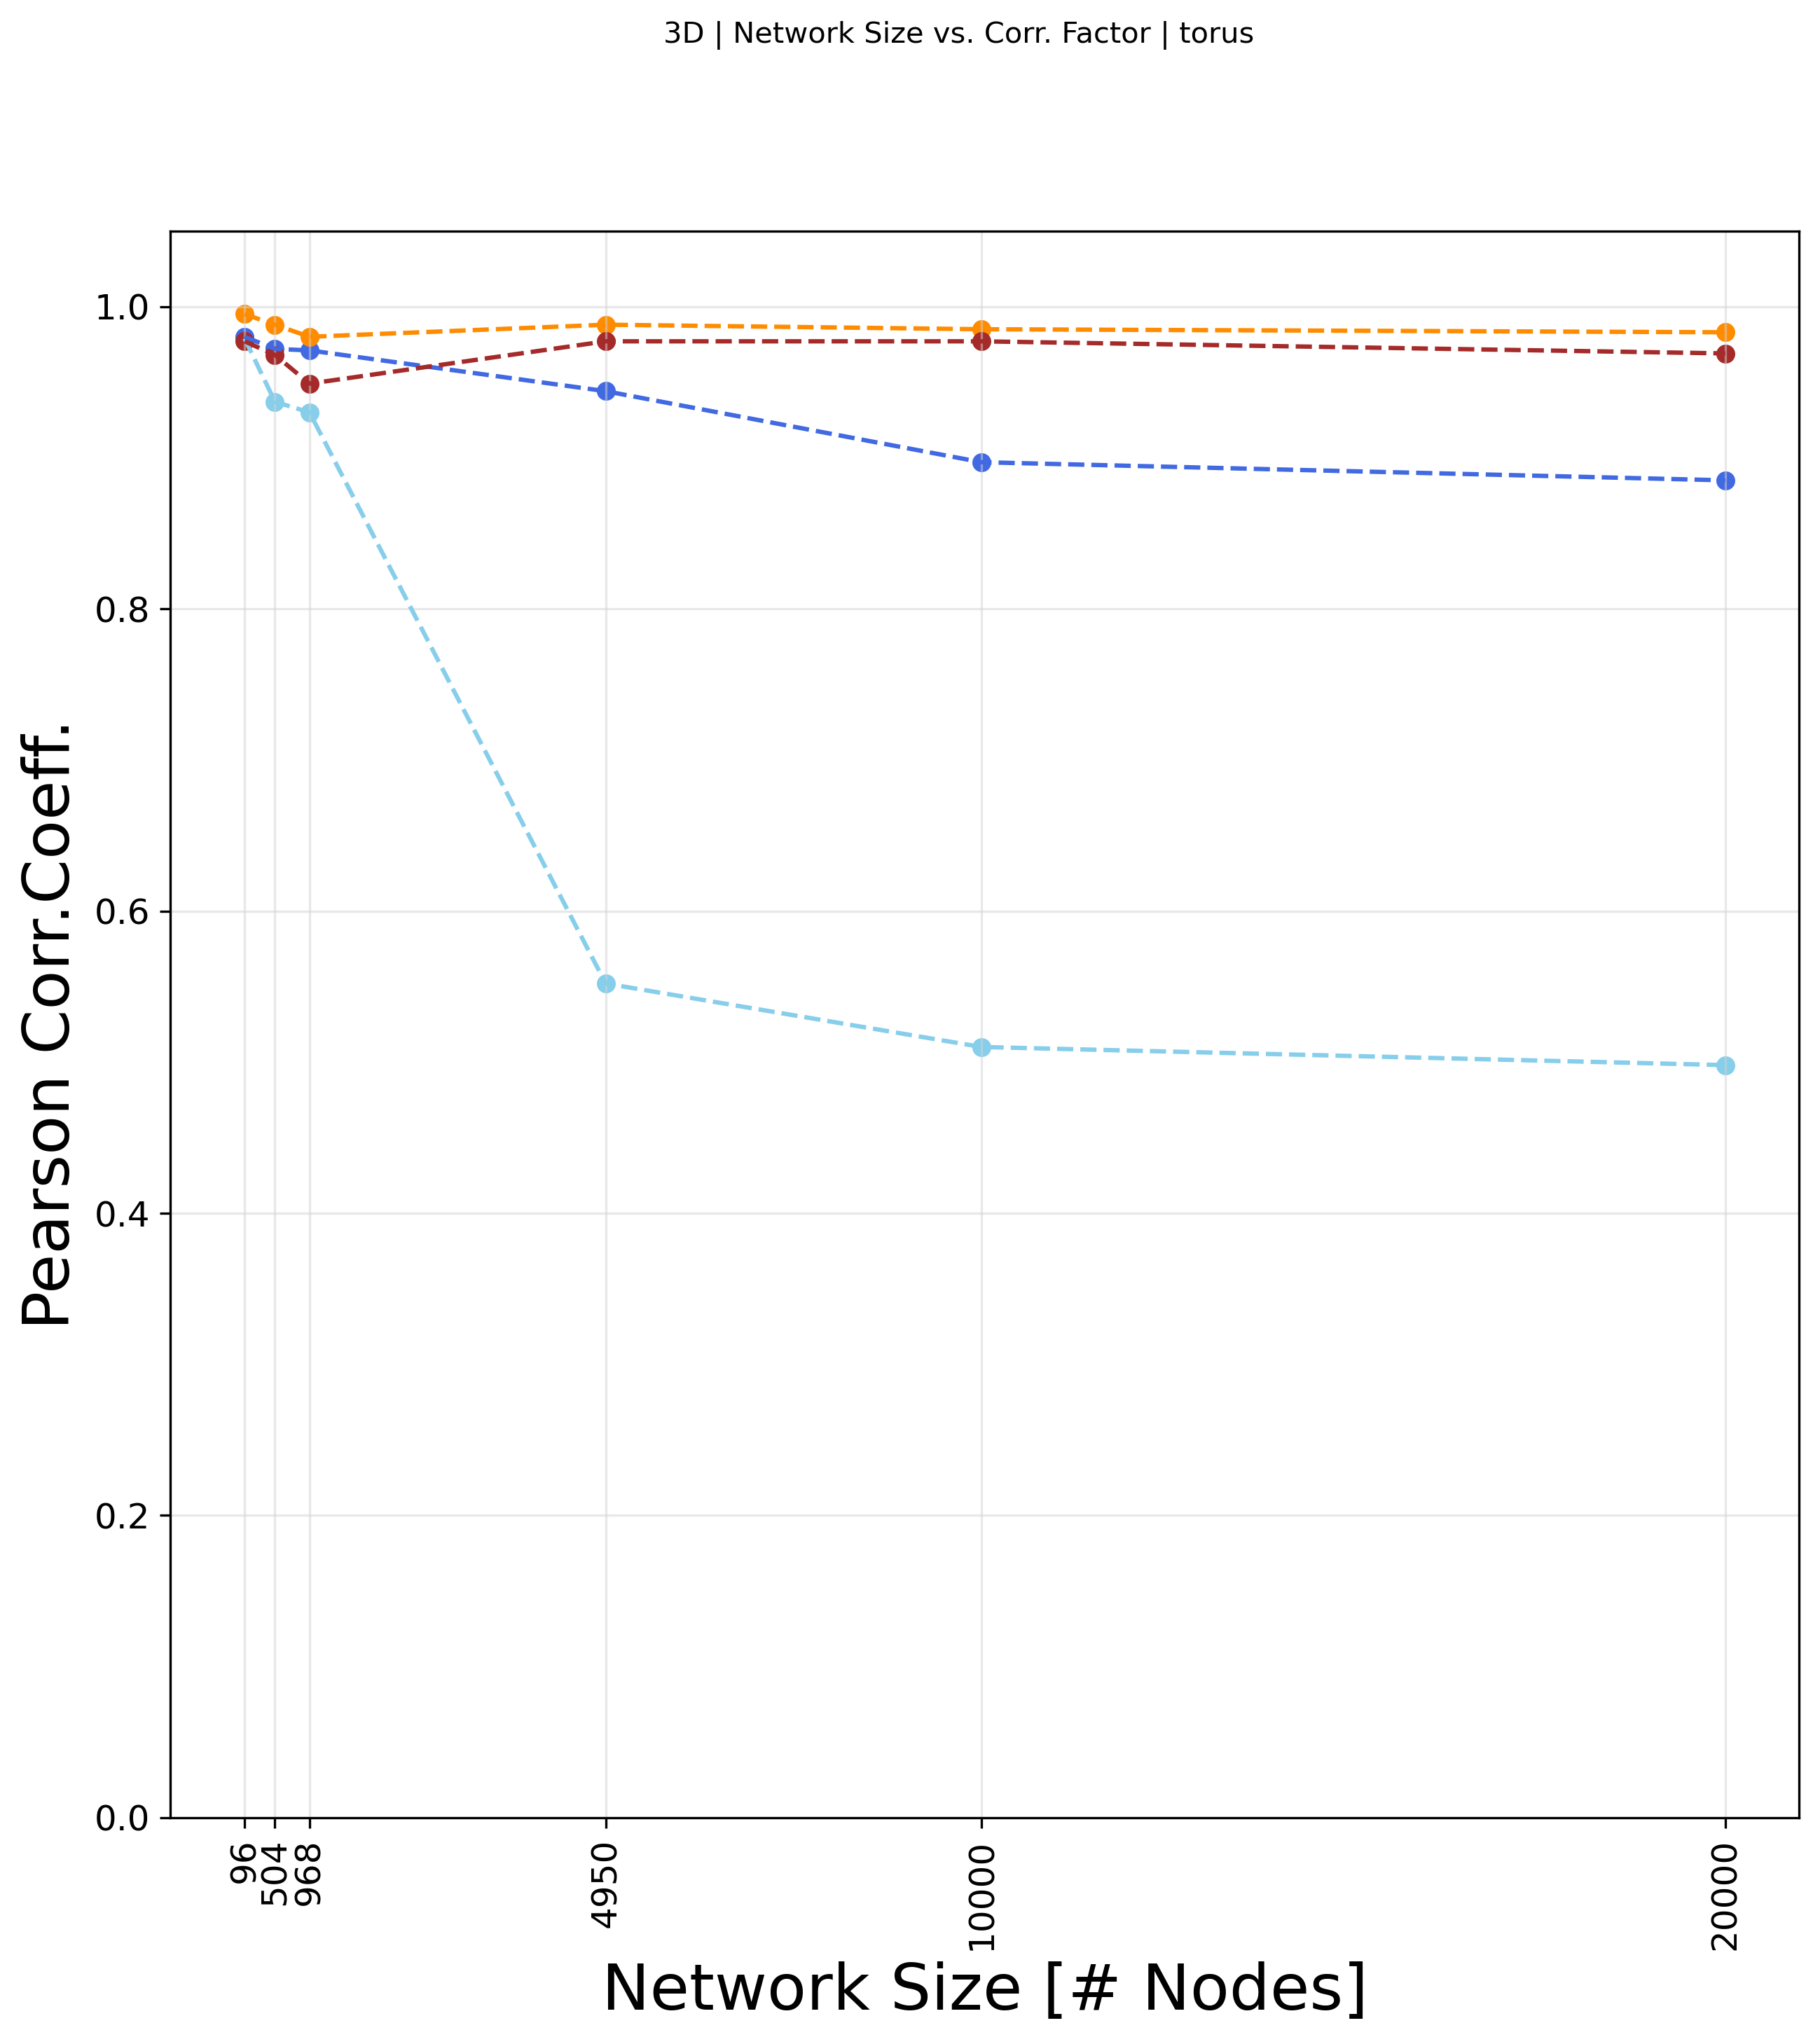

In [11]:
########################################
#
# Network size vs. Correlation Factor 
# with same running time
#
########################################

x_ig = net_sizes # list(d_netsize_time.keys())
y_ig = list(d_netsize_corr_ig.values())

x_nx = net_sizes # list(d_netsize_time.keys())
y_nx = list(d_netsize_corr_nx.values())

x_layout = net_sizes # list(d_netsize_time.keys())
y_layout = list(d_netsize_corr_global.values())

x_nodevec = net_sizes # list(d_netsize_time.keys())
y_nodevec = list(d_netsize_corr_nodevec.values())

fig = plt.figure(figsize=(10,10), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Pearson Corr.Coeff.", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nx, y_nx, c = 'skyblue', s = 30, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 1.0, linewidth=1.5)
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('3D | Network Size vs. Corr. Factor | '+organism, fontsize=10)
plt.ylim(ymin=0, ymax=1.05)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_3D_CorrNetsize_'+organism+'_ig_nx.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_3D_CorrNetsize_'+organism+'_ig_nx.pdf')

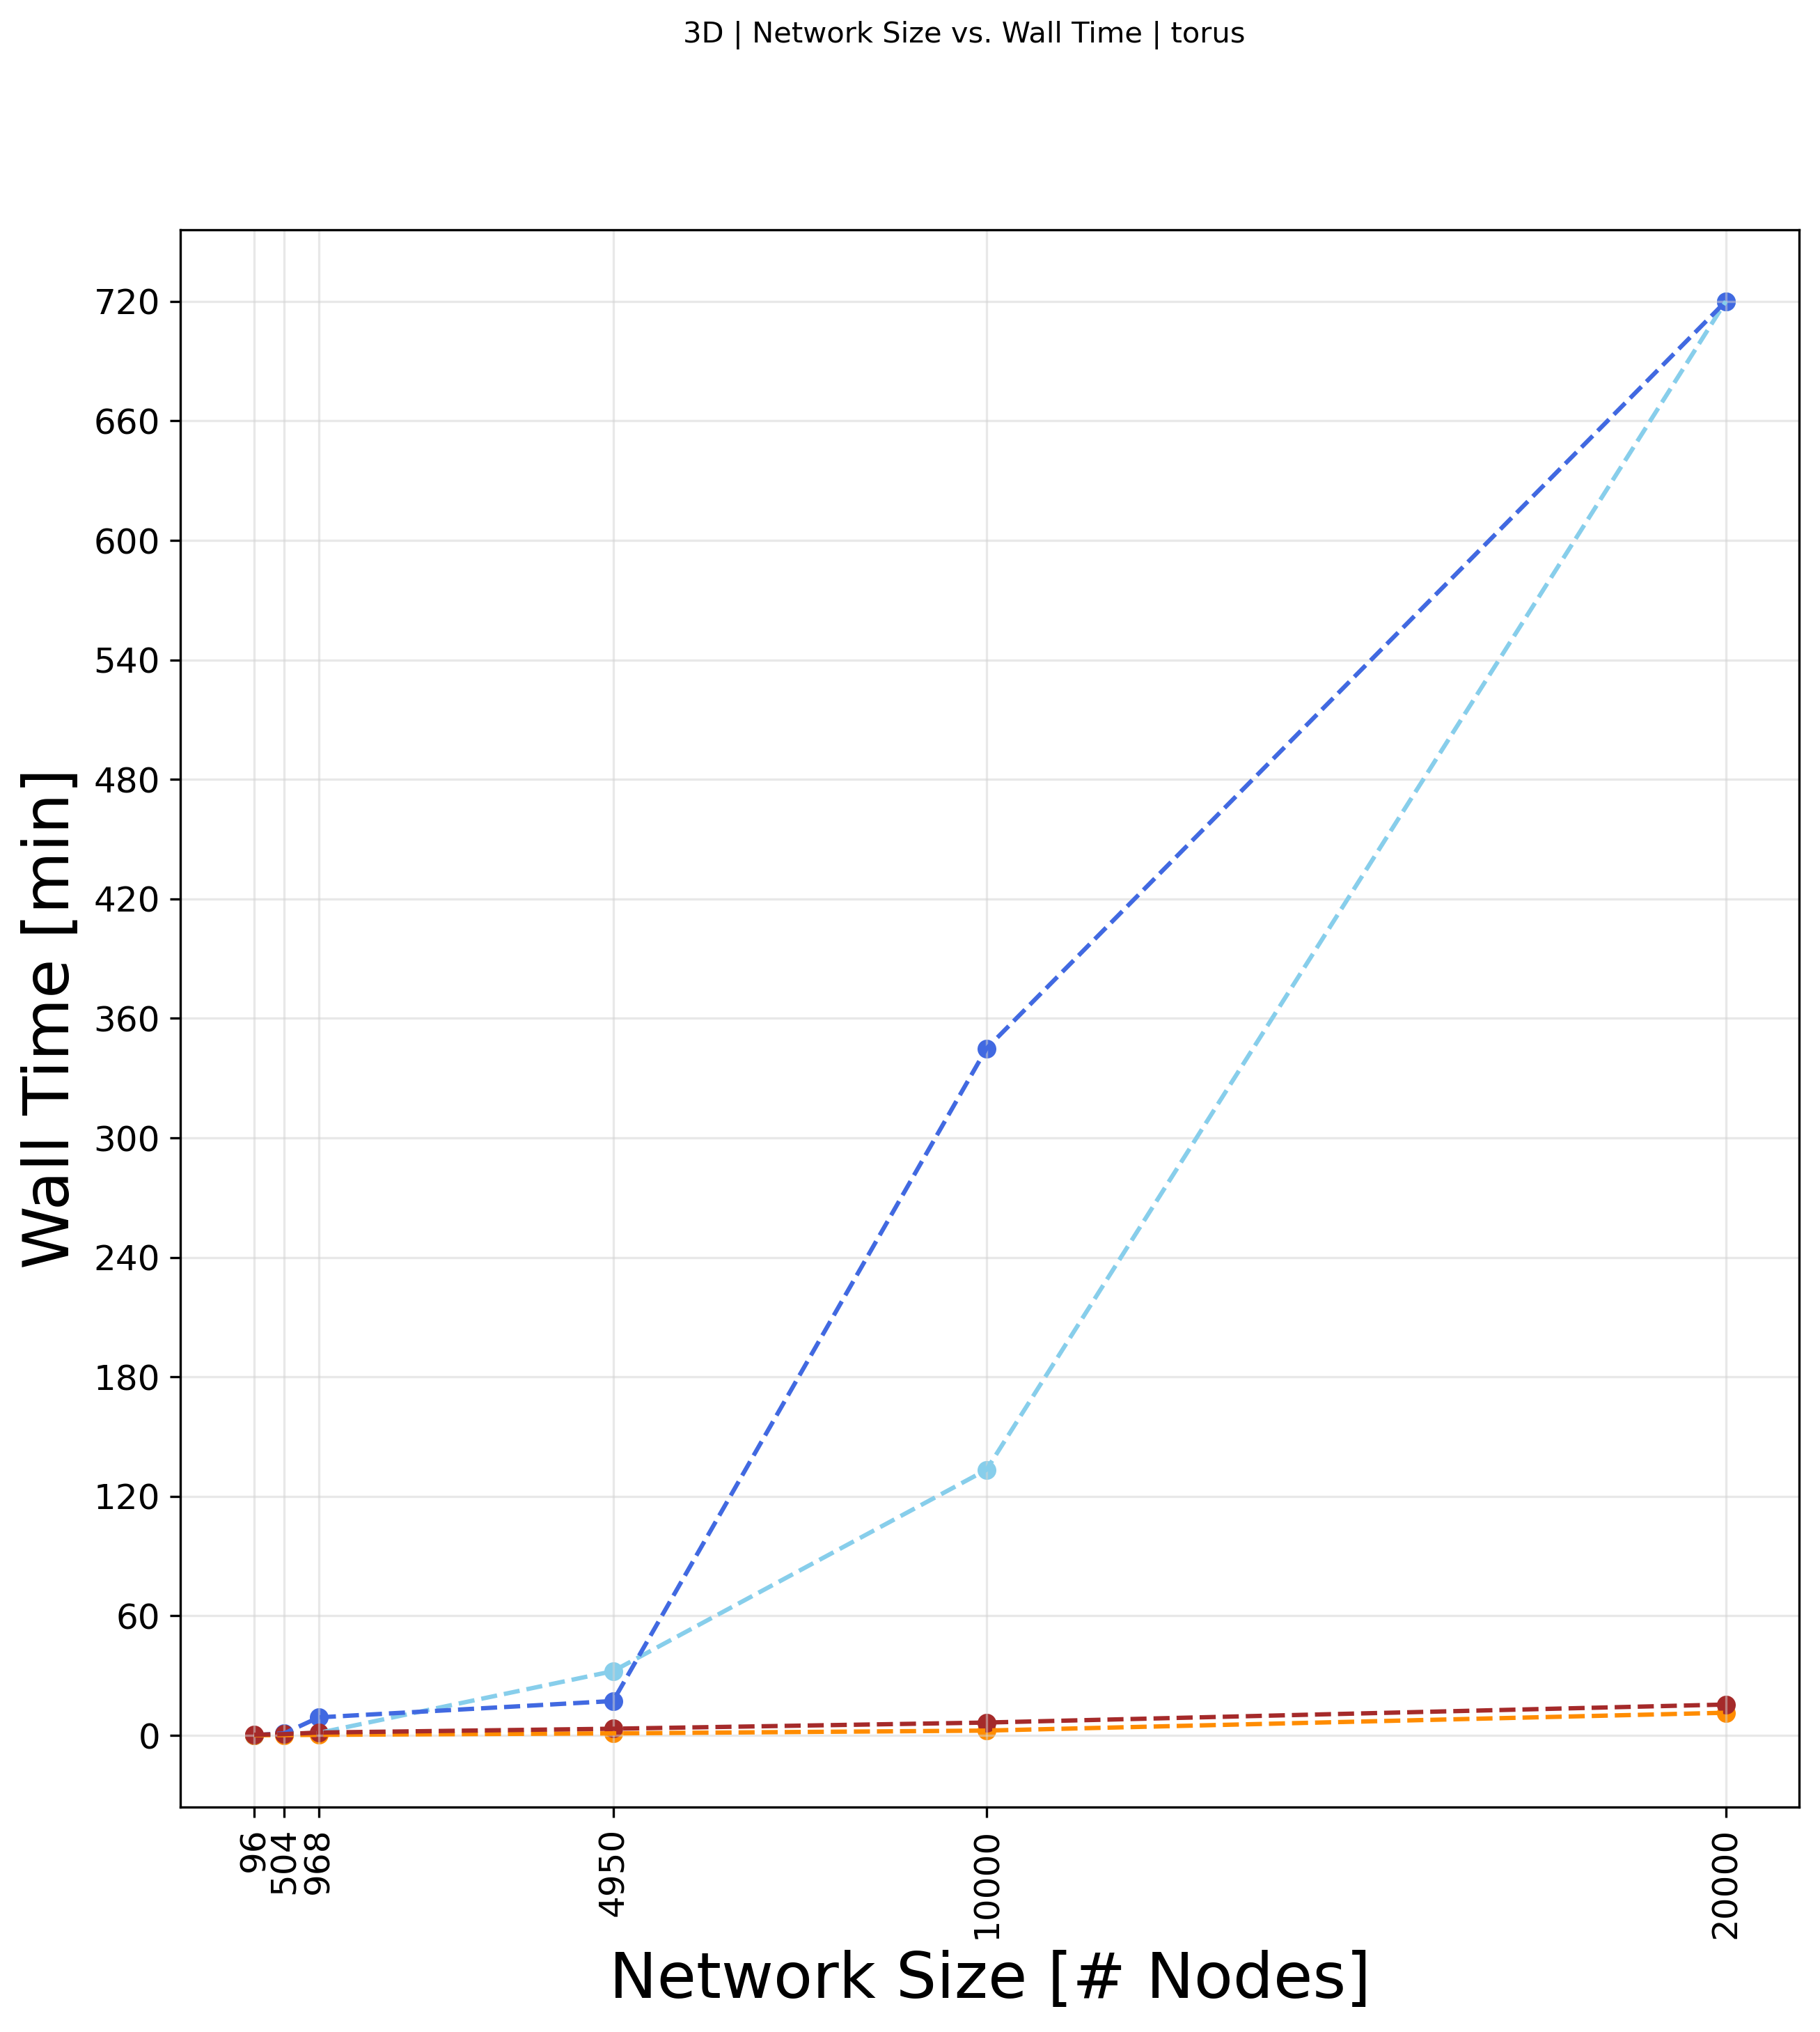

In [12]:
########################################
#
# Network size vs. time
# with same correlation factor
#
########################################


x_nx = net_sizes
y_nx = [(i/60) for i in d_netsize_time_nx.values()]# list(d_netsize_time_spring.values())

x_ig = net_sizes
y_ig = [(i/60) for i in d_netsize_time_ig.values()]# list(d_netsize_time_spring.values())

x_layout = net_sizes
y_layout = [(i/60) for i in d_netsize_time.values()]

x_nodevec = net_sizes
y_nodevec = [(i/60) for i in d_netsize_time_nodevec.values()]

fig = plt.figure(figsize=(10,10), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.yticks([0,60,120,180,240,300,360,420,480,540,600,660,720])
plt.ylabel("Wall Time [min]", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nx,y_nx, c = 'skyblue', s = 30, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 1.0, linewidth=1.5)
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('3D | Network Size vs. Wall Time | '+organism, fontsize=10)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_3D_TimeNetsize_'+organism+'_ig_nx.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_3D_TimeNetsize_'+organism+'_ig_nx.pdf')